https://medium.com/tensorist/classifying-yelp-reviews-using-nltk-and-scikit-learn-c58e71e962d9

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords

In [4]:
yelp = pd.read_csv('yelp_academic_dataset_review.csv')

In [5]:
yelp.shape

(5996996, 9)

In [6]:
yelp.head()

,business_id,cool,text,review_id,funny,useful,stars,user_id,date
0,iCQpiavjjPzJ5_3gPD5Ebg,0,The pizza was okay. Not the best I've had. I p...,x7mDIiDB3jEiPGPHOmDzyw,0,0,2,msQe1u7Z_XuqjGoqhB0J5g,2011-02-25
1,pomGBqfbxcqPv14c3XH-ZQ,0,I love this place! My fiance And I go here atl...,dDl8zu1vWPdKGihJrwQbpw,0,0,5,msQe1u7Z_XuqjGoqhB0J5g,2012-11-13
2,jtQARsP6P-LbkyjbO1qNGg,1,Terrible. Dry corn bread. Rib tips were all fa...,LZp4UX5zK3e-c5ZGSeo3kA,1,3,1,msQe1u7Z_XuqjGoqhB0J5g,2014-10-23
3,elqbBhBfElMNSrjFqW3now,0,Back in 2005-2007 this place was my FAVORITE t...,Er4NBWCmCD4nM8_p1GRdow,0,2,2,msQe1u7Z_XuqjGoqhB0J5g,2011-02-25
4,Ums3gaP2qM3W1XcA5r6SsQ,0,Delicious healthy food. The steak is amazing. ...,jsDu6QEJHbwP2Blom1PLCA,0,0,5,msQe1u7Z_XuqjGoqhB0J5g,2014-09-05


In [7]:
yelp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5996996 entries, 0 to 5996995
Data columns (total 9 columns):
business_id    object
cool           int64
text           object
review_id      object
funny          int64
useful         int64
stars          int64
user_id        object
date           object
dtypes: int64(4), object(5)
memory usage: 411.8+ MB


In [8]:
print(yelp.describe())

               cool         funny        useful         stars
count  5.996996e+06  5.996996e+06  5.996996e+06  5.996996e+06
mean   5.816597e-01  4.911249e-01  1.368465e+00  3.736306e+00
std    2.316354e+00  2.406411e+00  3.713469e+00  1.447924e+00
min   -1.000000e+00  0.000000e+00 -1.000000e+00  0.000000e+00
25%    0.000000e+00  0.000000e+00  0.000000e+00  3.000000e+00
50%    0.000000e+00  0.000000e+00  0.000000e+00  4.000000e+00
75%    1.000000e+00  0.000000e+00  2.000000e+00  5.000000e+00
max    5.050000e+02  9.910000e+02  1.234000e+03  5.000000e+00


In [9]:
print(type(yelp['text']))

<class 'pandas.core.series.Series'>


In [10]:
yelp['text'] = yelp['text'].astype(str)

In [11]:
yelp['text length'] = yelp['text'].apply(len)
yelp.head()

,business_id,cool,text,review_id,funny,useful,stars,user_id,date,text length
0,iCQpiavjjPzJ5_3gPD5Ebg,0,The pizza was okay. Not the best I've had. I p...,x7mDIiDB3jEiPGPHOmDzyw,0,0,2,msQe1u7Z_XuqjGoqhB0J5g,2011-02-25,449
1,pomGBqfbxcqPv14c3XH-ZQ,0,I love this place! My fiance And I go here atl...,dDl8zu1vWPdKGihJrwQbpw,0,0,5,msQe1u7Z_XuqjGoqhB0J5g,2012-11-13,317
2,jtQARsP6P-LbkyjbO1qNGg,1,Terrible. Dry corn bread. Rib tips were all fa...,LZp4UX5zK3e-c5ZGSeo3kA,1,3,1,msQe1u7Z_XuqjGoqhB0J5g,2014-10-23,156
3,elqbBhBfElMNSrjFqW3now,0,Back in 2005-2007 this place was my FAVORITE t...,Er4NBWCmCD4nM8_p1GRdow,0,2,2,msQe1u7Z_XuqjGoqhB0J5g,2011-02-25,901
4,Ums3gaP2qM3W1XcA5r6SsQ,0,Delicious healthy food. The steak is amazing. ...,jsDu6QEJHbwP2Blom1PLCA,0,0,5,msQe1u7Z_XuqjGoqhB0J5g,2014-09-05,165


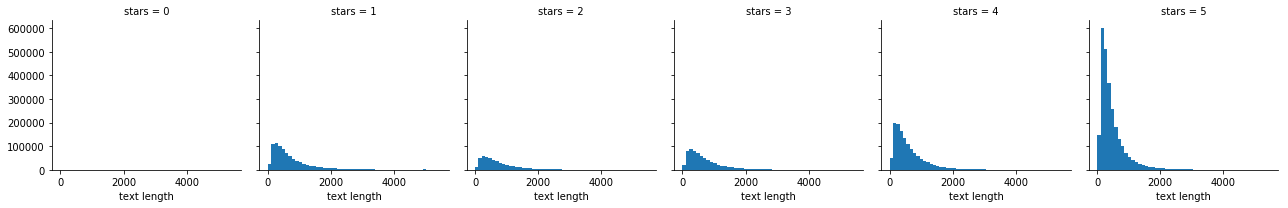

In [12]:
g = sns.FacetGrid(data=yelp, col='stars')
g.map(plt.hist, 'text length', bins=50)

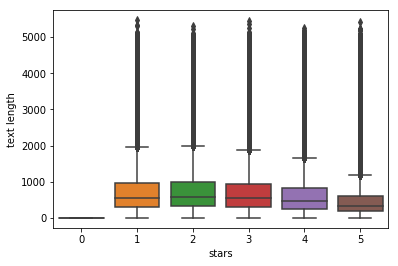

In [13]:
sns.boxplot(x='stars', y='text length', data=yelp)

In [14]:
stars = yelp.groupby('stars').mean()
stars.corr()

,cool,funny,useful,text length
cool,1.000000,0.575116,0.405789,0.578510
funny,0.575116,1.000000,0.943736,0.989749
useful,0.405789,0.943736,1.000000,0.949578
text length,0.578510,0.989749,0.949578,1.000000


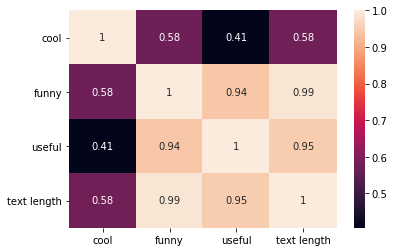

In [15]:
sns.heatmap(data=stars.corr(), annot=True)

In [16]:
yelp_class = yelp[(yelp['stars'] == 1) | (yelp['stars'] == 5)]
yelp_class.shape

(3500019, 10)

In [17]:
X = yelp_class['text'][:10]
y = yelp_class['stars'][:10]

In [18]:
X[10]

'I have been an Emerald Club member for a number of years.  I have always been very satisfied with their vehicles and customer service.  This recent visit to Pittsburgh was no exception.'

In [19]:
import string
def text_process(text):
    '''
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Return the cleaned text as a list of words
    '''
    nopunc = [char for char in text if char not in string.punctuation]
    nopunc = ''.join(nopunc)
    
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [20]:
nltk.download('stopwords')
sample_text = "Hey there! This is a sample review, which happens to contain punctuations."
print(text_process(sample_text))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\cmboy\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Hey', 'sample', 'review', 'happens', 'contain', 'punctuations']


In [21]:
from sklearn.feature_extraction.text import CountVectorizer

In [22]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(X)

In [23]:
bow_transformer

CountVectorizer(analyzer=<function text_process at 0x0000022DA6C33400>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocessor=None,
        stop_words=None, strip_accents=None,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, vocabulary=None)